In [1]:
from problem1 import *

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dat = pd.read_csv("Y.csv", header=None)
Y = dat.to_numpy()
Y.shape

(500, 2)

In [4]:
# Hyper parameters
dp_concentration = 1.0
alpha = 1.
theta = 0.5
dim = 2
N = Y.shape[0]
mh_iter = 1000
gibbs_iter = 100

In [5]:
states = algorithm2(Y, dp_concentration, alpha, theta, gibbs_iter, mh_iter)

Number of cluster: 1
Total data: 500
Current log likelihood: -2506.925617108565
Log likelihood after parameter update: -2135.539569775384
Number of cluster: 3
Total data: 500
Current log likelihood: -2134.8206518676498
Log likelihood after parameter update: -2118.9590466878317
Number of cluster: 1
Total data: 500
Current log likelihood: -2118.126507676425
Log likelihood after parameter update: -2118.126507676425
Number of cluster: 1
Total data: 500
Current log likelihood: -2118.126507676425
Log likelihood after parameter update: -2118.184680423579
Number of cluster: 1
Total data: 500
Current log likelihood: -2118.184680423579
Log likelihood after parameter update: -2115.6232977902146
Number of cluster: 3
Total data: 500
Current log likelihood: -2109.3762621928527
Log likelihood after parameter update: -2104.1312611224507
Number of cluster: 3
Total data: 500
Current log likelihood: -2094.0722900140418
Log likelihood after parameter update: -2090.881038841996
Number of cluster: 2
Total d

In [48]:
z = states[-1][0].astype(int)
cl_ids, cl_counts = np.unique(z, return_counts=True)
print(cl_ids)
print(cl_counts)

[0 1 2 3]
[298  52 145   5]


In [49]:
params = states[-1][1]
print(params)

[{'mu': array([1.00418984, 3.25571595]), 'gamma': array([2.32976668, 1.33740839])}, {'mu': array([-3.53931535,  0.80558744]), 'gamma': array([1.52491327, 0.54097489])}, {'mu': array([-1.76446956, -1.46395406]), 'gamma': array([2.77866777, 1.74976987])}, {'mu': array([-0.55465928,  1.92284255]), 'gamma': array([2.11204019, 0.65094555])}]


In [50]:
cl_ids

array([0, 1, 2, 3])

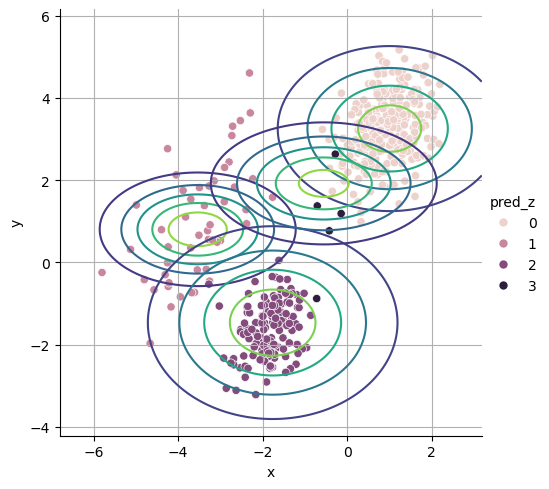

In [51]:
x_min = np.min(Y[:,0]) - 1
x_max = np.max(Y[:,0]) + 1
y_min = np.min(Y[:,1]) - 1
y_max = np.max(Y[:,1]) + 1
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.dstack((x, y))

dat = pd.DataFrame({"x": Y[:,0], "y": Y[:,1], "pred_z": z})
g = sns.relplot(data=dat, x="x", y="y", hue="pred_z")
# Calculate the density values
for k in cl_ids:
    rv = multivariate_normal(params[k]["mu"], np.diag(params[k]["gamma"]))
    z = rv.pdf(pos)
    plt.contour(x, y, z, levels=5, linewidths=1.5, alpha=1, cmap='viridis')

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
plt.show()
#plt.savefig("pml-a3/problem1_q1_example_fig.png")